# Que 11. What are the top 5 most frequently occurring nodes in the log?

basic steps followed to answer the questions were reffered from
https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_df.html

In [1]:
#importing necessary libraries and datatypes

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DateType, TimestampType, IntegerType
from pyspark.sql.functions import *
import time
import matplotlib.pyplot as plt
import pandas as pd

#setting up a spark session

session = SparkSession.builder.appName("BGLlog").getOrCreate()

23/08/07 11:51:00 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [2]:
# start time of the program
start_program_time= time.time()

# Schema Design

In [3]:
# defined the schema for the BGL log data

BGL_schema = StructType([

    StructField("AlertFlag", StringType(),True),
    
    # first Timestamp is assigned to IntegerType datatype and later to TimestampType datatype, 
    # as initializing Timestamp to "TimestampType" datatype in the beginning was not possible.
    StructField("Timestamp", IntegerType(),True), 

    StructField("Date", StringType(),True),

    StructField("Node", StringType(),True),

    StructField("date_and_time", TimestampType(),True),

    StructField("Node_Rep", StringType(),True),

    StructField("Message_Type", StringType(),True),

    StructField("SysComp", StringType(),True),

    StructField("Level", StringType(),True),

    StructField("Message_Content", StringType(),True)

])

In [4]:
# read the BGL log data from the CSV file with the specified schema (i.e. BGL_schema) 
# and date/timestamp formats are specified

BGL_df=session.read.csv(
    "BGLnew.log",
    schema = BGL_schema,
    dateFormat = "yyyy.MM.dd", 
    timestampFormat = "yyyy-MM-dd-HH.mm.ss.SSSSSS", 
    )

In [5]:
# cast the Timestamp coloumn to proper TimestampType 

BGL_df = BGL_df.withColumn("Timestamp", BGL_df["Timestamp"].cast(TimestampType()))

In [6]:
# print the schema to confirm the schema update of the Dataframe

BGL_df.printSchema()

root
 |-- AlertFlag: string (nullable = true)
 |-- Timestamp: timestamp (nullable = true)
 |-- Date: string (nullable = true)
 |-- Node: string (nullable = true)
 |-- date_and_time: timestamp (nullable = true)
 |-- Node_Rep: string (nullable = true)
 |-- Message_Type: string (nullable = true)
 |-- SysComp: string (nullable = true)
 |-- Level: string (nullable = true)
 |-- Message_Content: string (nullable = true)



# Transformation on BGL dataframe

In [7]:
# filter the BGL dataFrame to remove rows where the "Node" column is either "NULL" or "UNKNOWN_LOCATION"

filtered_df = BGL_df.filter((col("Node") != "NULL") & (col("Node") != "UNKNOWN_LOCATION"))

# Action on the filtered dataframe

In [8]:
# group the filtered dataframe by "Node" and count the occurrences of each node

node_frequency = filtered_df.groupBy("Node").count()

In [9]:
# order the nodes by the count of occurrences in descending order

node_frequency = node_frequency.orderBy(col("count").desc())

In [10]:
# get the top 5 nodes with the highest occurrences

top_5_nodes = node_frequency.limit(5)

In [11]:
# convert the result to a Pandas dataframe for plotting
top_5_nodes_pandas = top_5_nodes.toPandas()

In [12]:
# show the resulting dataframe containing the top 5 nodes

top_5_nodes.show()

+-------------------+------+
|               Node| count|
+-------------------+------+
|R30-M0-N9-C:J16-U01|152329|
|R02-M1-N0-C:J12-U11| 64651|
|R37-M1-NC-C:J02-U11| 35288|
|R16-M1-N2-C:J17-U01| 16921|
|R26-M0-N0-I:J18-U11| 14876|
+-------------------+------+



To get a visual representaion of the above result, convert the PySpark dataframe to Pandas dataframe for plotting a graph. To use the functionalities to plot a graph, import matplotlib.pyplot. To import the libaries of matplotlib, first run "pip install matplotlib" in the terminal. Basic steps followed to visualize the analysis on the nodes were reffered from https://sparkbyexamples.com/pandas/plot-the-dataframe-in-a-bar-in-pandas/

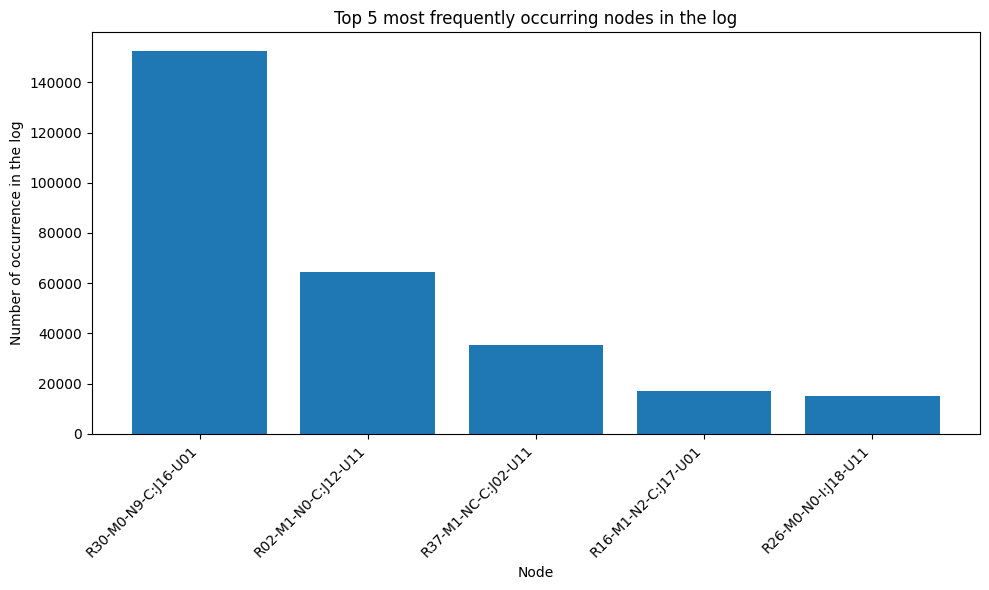

In [13]:
# plot the graph for the top 20 nodes that resulted in 
plt.figure(figsize=(10, 6))
plt.bar(top_5_nodes_pandas["Node"], top_5_nodes_pandas["count"])
plt.xlabel("Node")
plt.ylabel("Number of occurrence in the log")
plt.title("Top 5 most frequently occurring nodes in the log")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Execution Time of the Program

In [14]:
# end time of the program
end_program_time= time.time()

# calculate executation time
end_program_time-start_program_time

6.093954801559448